In [ ]:
#keras basics
#1.Sequential API - Beginner level API (model is created layer by layer)
#2.Functional API - Intermediate level API (model is created for all layers at once)

#LAYERS in KERAS
#1. Dense layer : regularly connected neural network
#2. Activation Layer: which specifies activation function
#3. Flatten layer: flattens the input values

In [ ]:
#MODEL BUILDING IN KERAS
#1.Gather the data (df, preprocessing, eda)
#2. Using Sequential API, create NN architecture(create artifical neurons)
#INPUT LAYER, no need to flatten if it in vector form
#Hidden Layer: input_shape,activation function
#output layer : activation function
#3. Compile : Loss Function, optimizer: GD, Adam; metrics(accuracy,etc.)
#4. Fit the model: epochs, batch size, (epochs=50, batch_size=50) model trains the whole data 50 times, at a time 50 objects are accepted/read by the model
#5. Predict the new values and evaluate the model

In [ ]:
#LOSS Functions
#For regression, we have MSE and MAE

In [ ]:
#mean squared error
import numpy as np
y_real=np.array([1000,2000,3000])
y_pred1=np.array([1100,1950,3000])
#finding the error
diff=np.subtract(y_real,y_pred1)
diff

array([-100,   50,    0])

In [ ]:
sq_error=np.square(diff)
sq_error

array([10000,  2500,     0])

In [ ]:
m_sq_error=np.mean(sq_error) #finding the mean squared error
m_sq_error

4166.666666666667

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real,y_pred1)

4166.666666666667

In [ ]:
#mean absolute error
import numpy as np
y_real=np.array([1000,2000,3000])
y_pred1=np.array([1100,1950,3000])
#finding the error
diff=np.subtract(y_real,y_pred1)
diff

array([-100,   50,    0])

In [ ]:
mae=np.absolute(diff).mean()
mae

50.0

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_real,y_pred1)

50.0

In [ ]:
#Loss Function for classification
#For binary, we use BCE(Binary Cross Entropy)
#measure of difference between 2 probabilities
#BCE= -(p(x).logq(x))+(1-p(x)).log(1-q(x))
#here p(x) is actual op, q(x) is predicted op

In [ ]:
import numpy as np
from math import log
#Binary cross entropy
p=[1,1,1,1,0,0,0,0] #actual op
q=[0.8, 0.75, 0.7, 0.5, 0.3, 0.3, 0.4, 0.1] #predicted op

def binary_ce(p,q):
  return -((p*log(q))+((1-p)*log(1-q)))

result=[]
for i in range(len(p)):
  ce=binary_ce(p[i],q[i])
  result.append(ce)
mean_ce= np.mean(result)
mean_ce

0.3612729719457438

In [ ]:
from tensorflow import keras
bce=keras.losses.BinaryCrossentropy()
bce(p,q).numpy()

0.3612728

In [ ]:
#RULES regarding activation function
#no activation function is required for ip layer
#for op layer, the activation functions depends based on the problem
# For regression- use relu(for +ve values), or linear(for -ve as well as -ve)
# For classification - if binary, use sigmoid; if multi-class, use softmax
# Hidden layer, always use relu
#We will likely get wrong results in the first time of forward propagation because weights and bias are randomly assigned and not trained
#our main aim is to find hte correct weights, so that the accuracy will increase and losses reduce

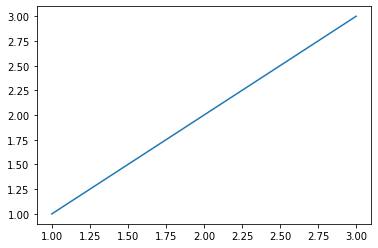

In [ ]:
import matplotlib.pyplot as plt
#Linear
x=[1,2,3]
y=x
plt.plot(x,y)
plt.show()

In [ ]:
#RELU - Rectified Linear Unit , could be considered as half linear
#Formula for RELU is x*(x>0)
# if value is greater than then zero, then the value is considered to the anser
# if it is lesser than zero, then the answer will be considered zero

In [ ]:
x=54
print(x>0)
print(x*(x>0)) #applying relu function

True
54


In [ ]:
x=-95
print(x>0)
print(x*(x>0))

False
0


[-3.     -2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5
 -1.3125 -1.125  -0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875
  0.375   0.5625  0.75    0.9375  1.125   1.3125  1.5     1.6875  1.875
  2.0625  2.25    2.4375  2.625   2.8125  3.    ]
[-0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.
 -0.     -0.     -0.     -0.     -0.     -0.     -0.      0.      0.1875
  0.375   0.5625  0.75    0.9375  1.125   1.3125  1.5     1.6875  1.875
  2.0625  2.25    2.4375  2.625   2.8125  3.    ]


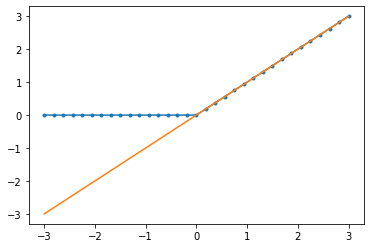

In [ ]:
x=np.linspace(-3,3,33)
print(x)

def relu(x):
    return x*(x>0)

y=relu(x)
print(y)
plt.plot(x,y,marker=".")
plt.plot(x,x)
plt.show()

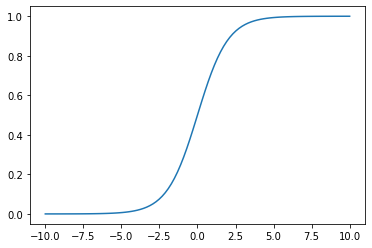

In [ ]:
#Sigmoid activation function for binary classification
x=np.linspace(-10,10,100)
z= 1/(1+np.exp(-x))
plt.plot(x,z)
plt.show()

In [ ]:
#CALIFORNIA HOUSING DATASET

In [1]:
from sklearn.datasets import fetch_california_housing
house=fetch_california_housing()

In [2]:
type(house)

sklearn.utils.Bunch

In [3]:
#Bunch is a dictionary like variable. It has a key and a value

In [6]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(house['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
#create a dataframe from sklearn bunch
import pandas as pd
df = pd.DataFrame(house['data'],columns=house['feature_names'])
df['Target']=house['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
df.shape

(20640, 9)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
#splitting the data into ip and op
x=df.iloc[:,0:6].values
y=df.iloc[:,8].values

In [21]:
#splitting the values into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
x_train.shape

(14448, 6)

In [17]:
x_test.shape

(6192, 6)

In [18]:
14448+6192

20640

In [19]:
y_train.shape

(14448,)

In [20]:
y_test.shape

(6192,)

In [24]:
#normalize the input values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
#create a simple neural network of 1 hidden layer
from tensorflow import keras
from keras import layers

In [29]:
x_train[0].shape

(6,)

In [32]:
model= keras.Sequential()
model.add(layers.Dense(5,activation='relu',input_shape=x_train[0].shape)) #hidden layer
model.add(layers.Dense(1))  #output
#6 i/p columns (6*5)+5 = 35 param
#1 o/p column (1*5)+1 = 6 param

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 35        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.get_weights()

[array([[-0.4009852 ,  0.04163551, -0.01714617,  0.32303113,  0.72516817],
        [ 0.05019164, -0.41842702, -0.2144528 ,  0.4424984 ,  0.40662795],
        [-0.73633766, -0.15996826, -0.05477774,  0.08199608, -0.658859  ],
        [ 0.45967275,  0.40290755, -0.14796764,  0.29195303, -0.17068154],
        [ 0.30845004,  0.34399837,  0.16510463, -0.6182045 , -0.41102058],
        [-0.08405626,  0.29576653, -0.32679513,  0.05430633, -0.6525056 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.42441702],
        [-0.924685  ],
        [-0.92839646],
        [-0.58729935],
        [-0.76061845]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
x_train_scaled.shape

(14448, 6)

In [45]:
model.fit(x_train_scaled,y_train,epochs=15)
#batchsize default=32

Epoch 1/15
452/452 [==============================] - 1s 1ms/step - loss: 5.8367
Epoch 2/15
452/452 [==============================] - 1s 1ms/step - loss: 3.0099
Epoch 3/15
452/452 [==============================] - 1s 1ms/step - loss: 1.3008
Epoch 4/15
452/452 [==============================] - 1s 1ms/step - loss: 0.6367
Epoch 5/15
452/452 [==============================] - 1s 1ms/step - loss: 0.5693
Epoch 6/15
452/452 [==============================] - 1s 2ms/step - loss: 0.5438
Epoch 7/15
452/452 [==============================] - 1s 2ms/step - loss: 0.5291
Epoch 8/15
452/452 [==============================] - 1s 1ms/step - loss: 0.5201
Epoch 9/15
452/452 [==============================] - 1s 1ms/step - loss: 0.5135
Epoch 10/15
452/452 [==============================] - 1s 1ms/step - loss: 0.5089
Epoch 11/15
452/452 [==============================] - 1s 2ms/step - loss: 0.5047
Epoch 12/15
452/452 [==============================] - 1s 1ms/step - loss: 0.5015
Epoch 13/15
452/452 [====

In [46]:
14448/32

451.5

In [47]:
model.get_weights()

[array([[ 0.80052865,  0.08463052, -0.222531  ,  0.1608416 ,  0.5783617 ],
        [ 0.23149991, -0.10535074,  0.06468855,  0.06600725,  0.01543713],
        [-0.35258058, -0.30812493,  0.3284045 , -0.17719974, -0.5271097 ],
        [ 0.22652863,  0.23624896, -0.635916  ,  0.14773376,  0.08872691],
        [ 0.12508948, -0.02475816,  0.11647627, -0.33720076, -0.10198458],
        [-1.9437287 ,  0.01647153, -0.25794813,  0.00580486, -0.14909205]],
       dtype=float32),
 array([ 0.9234335 , -0.45994112,  0.11486854, -0.37719697, -0.68060845],
       dtype=float32),
 array([[ 1.3489003 ],
        [-0.55293804],
        [-1.0566856 ],
        [-0.2730292 ],
        [-0.8624697 ]], dtype=float32),
 array([0.97966725], dtype=float32)]

In [48]:
y_pred=model.predict(x_test_scaled)
y_pred

array([[1.6611549],
       [2.8945384],
       [2.1657407],
       ...,
       [3.9646664],
       [0.8340045],
       [2.596611 ]], dtype=float32)

In [49]:
y_test

array([1.369, 2.413, 2.007, ..., 3.519, 0.925, 2.983])

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.5037386771634889